<h1 style="color:blue;"> Customer Segmentation</h1>

<p style="color:brown;">In this notebook we will be working on the "Mall Customer Segmentation Data" taken from Kaggle and applying different clustering techniques. </p> 

In [1]:
#Importing the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm
import warnings
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN 
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("/usr/local/notebooks/datasets/Mall_Customers.csv")

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print('There are {} rows and {} columns in our dataset'.format(dataset.shape[0],dataset.shape[1]))

There are 200 rows and 5 columns in our dataset


<span style="color:brown;">
There are 5 columns:

<li>Customer ID: It is the unique customer id.</li>
<li>Gender: It is the gender of the customer. </li>
<li>Age: It is the age of the customer. </li>
<li>Annual Income (k$): It is annual earning of the customer. </li>
<li>Spending Score (1-100): This is a spending score assigned to the customer by the Mall executives.</li>
</span>

In [4]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<p style="color:brown;">So, we can see that there are no missing values present in the dataset.</p>

<h1 style="color:blue;"> Exploratory Data Analysis</h1>

<p style="color:brown;">We will now be verifying that there are no duplicates in the CustomerID column.</p>

In [8]:
print(f"The number of customers are {dataset['CustomerID'].nunique()}")
print(f"It matches with the number of rows of the dataframe which are {dataset.shape[0]}.")

The number of customers are 200
It matches with the number of rows of the dataframe which are 200.


<p style="color:brown;">We will plot the Histograms of the numerical columns.</p>

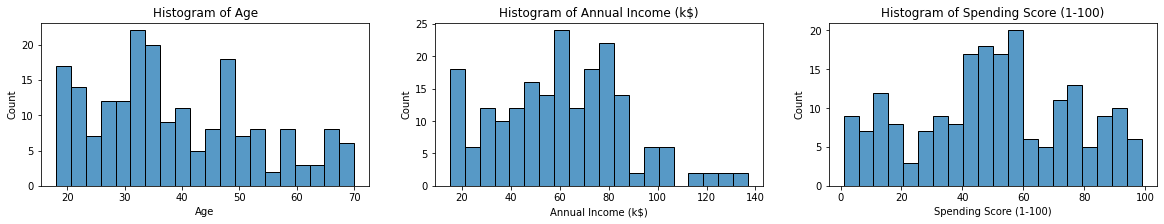

In [9]:
plt.rcParams["figure.figsize"] = (20,3)
for idx, x in enumerate(['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']):
    plt.subplot(1 , 3 , idx + 1)
    sns.histplot(dataset[x] , bins = 20)
    plt.title(f'Histogram of {x}')
plt.show()

<p style="color:brown;">We will plot the bar chart for the </p>

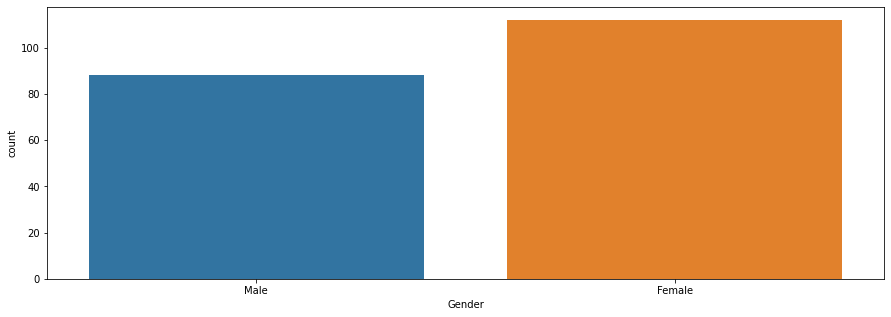

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x = 'Gender' , data = dataset)
plt.show()

<p style="color:brown;">We will plot the pairplot showing the scatter plot between the respective numerical columns.</p>

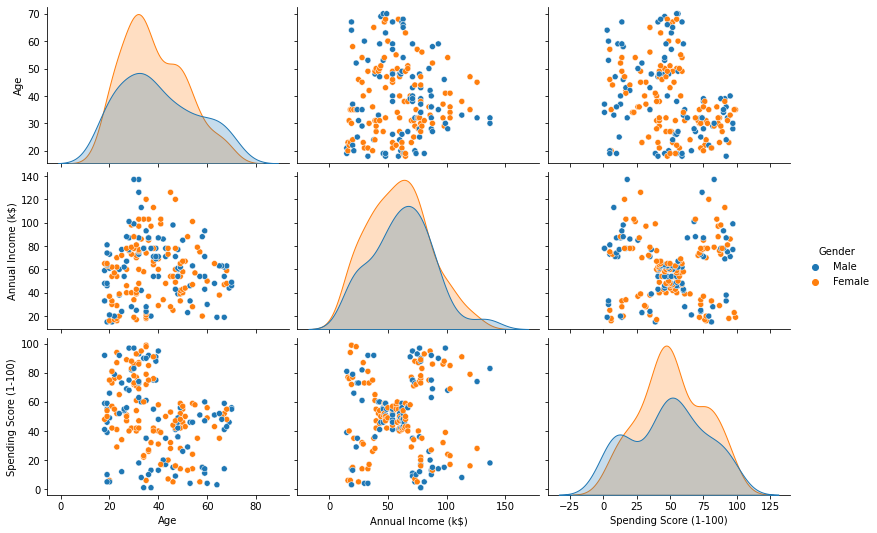

In [11]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

<h1 style="color:blue;">Clustering</h1>

<p style="color:brown;">We will be applying the following clustering techniques on the dataset.</p>
<ol style="color:brown;">
<li>KMeans Clustering</li>
<li>Hierarchical Clustering</li>
<li>DbScan Clustering</li>
</ol>


<p style="color:brown;">We will be doing the clustering based on the following columns and then analyze the customers lying in clusters.</p>
<ul style="color:brown;">
<li>Annual Income (k$)</li>
<li>Spending Score (1-100)</li>
</ul>



In [12]:
filtered_dataset = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]
filtered_dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<h1 style="color:blue;">KMeans Clustering</h1>

In [13]:
wcss=[]  # This list stores the within clusters sum of squares for a given clustering

# We will try clusters from 1 to 11 and then record the within clusters sum of squares for each cluster
for i in tqdm(range(1,11)): 
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(filtered_dataset)
    wcss.append(kmeans.inertia_)

100%|██████████| 10/10 [00:00<00:00, 20.71it/s]


<p style="color:brown;font-size:20px;">Elbow Method</p>
<hr>
<p style="color:brown;">Elbow method is used to find the optimal numbers of Clusters to form. In the plot below we will be able to see elbow like structure being formed. The point at which the elbow like structure is being formed gives us the optimal number of clusters. On the x-axis we take the number of clusters and on y-axis we take the within clusters sum of squares corresponding to each cluster. </p>
<hr>


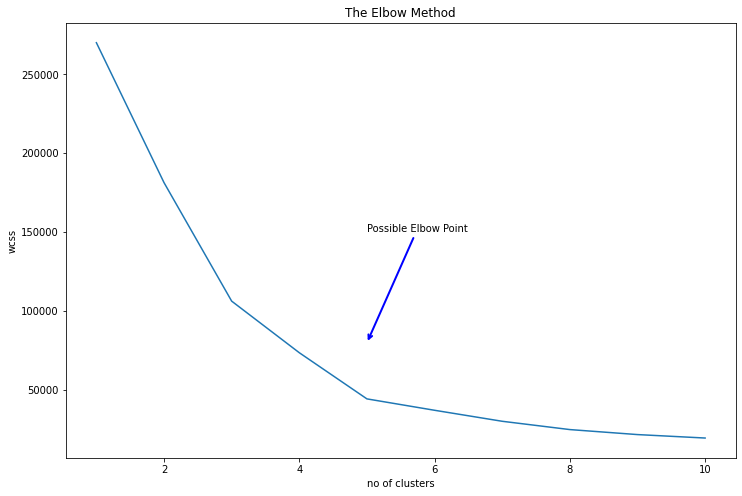

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=wcss, ax=ax)
ax.set_title('The Elbow Method')
ax.set_xlabel('no of clusters')
ax.set_ylabel('wcss')


# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

<p style="color:brown;">From the above plot we can see that the elbow like structure is being formed at points 3 and 5. So this shows us that the optimal number of clusters can be either 3 or 5. We will be going with 5 clusters. </p>

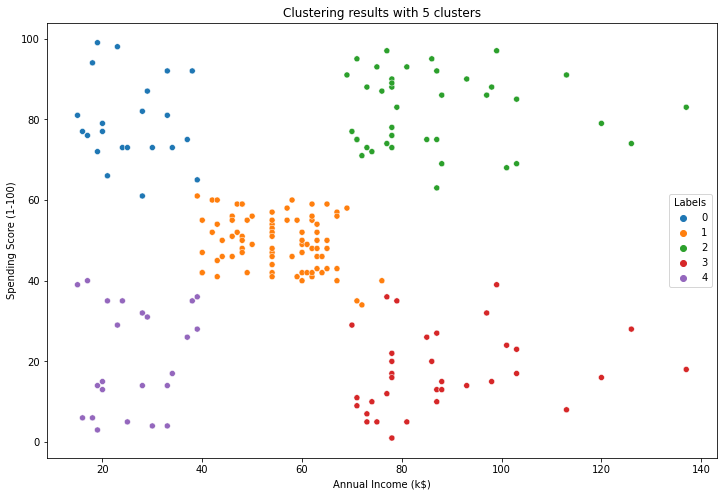

In [15]:
# Doing the clustering with 5 clusters
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=3456).fit(filtered_dataset)
filtered_dataset['Labels'] = kmeans_model.labels_

# Plotting the clusters on the Screen
plt.figure(figsize=(12, 8))
sns.scatterplot(filtered_dataset['Annual Income (k$)'], filtered_dataset['Spending Score (1-100)'], 
                hue=filtered_dataset['Labels'], 
                palette=sns.color_palette("tab10", 5))
plt.title('Clustering results with 5 clusters')
plt.show()

<p style="color:brown;font-size:20px;">Clustering Interpretation</p>

<hr>
<ol style="color:brown;">
<li>The cluster shown in top left shows us the customers which have low annual income but high spending score.</li>
<li>The cluster shown in bottom left shows us the customers which have low annual income and also low spending score.</li>
<li>The cluster shown in middle shows us the customers which have average annual income and average spending score.</li>
<li>The cluster shown in top right shows us the customers which have high annual income and high spending score.</li>
<li>The cluster shown in bottom right shows us the customers which have high annual income and low spending score.</li>  
<li>The customers having high spending scores could be the potential targets for Business Executives to increase revenue.</li>      
</ol>
<hr>


<h1 style="color:blue;">Hierarchical Clustering</h1>

<p style="color:brown;">Now we will be applying Heirarchical Clustering on the given problem. We will be applying Agglomerative Clustering on the problem which is most commonly used. We will be using Agglomerative clustering module provided by the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">Scikit Learn library</a>Two important parameters being passed into the clustering algorithm are: </p>

<ol style="color:brown;">
<li>n_clusters: The number of clusters to find.</li>
<li>linkage: The linkage criterion determines which distance to use between sets of observation. It can take on the following values:</li>
<ul>
<li>‘ward’ minimizes the variance of the clusters being merged.</li>

<li>‘average’ uses the average of the distances of each observation of the two sets.</li>

<li>‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.</li>

<li>‘single’ uses the minimum of the distances between all observations of the two sets.</li>
</ul>
    
</ol>

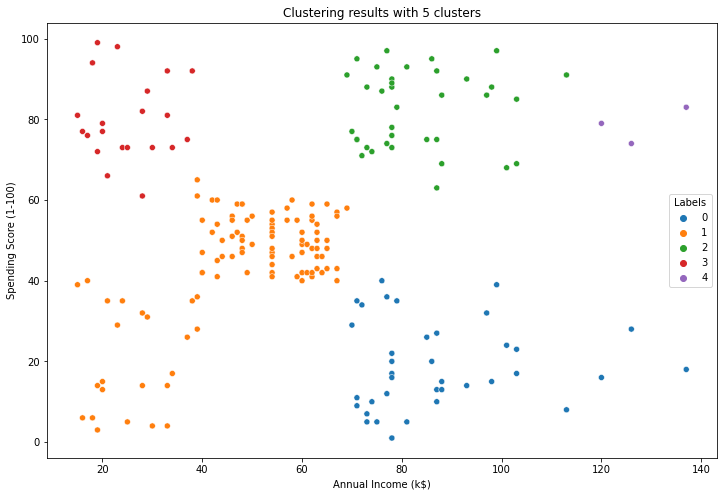

In [16]:
agglomerative_model = AgglomerativeClustering(n_clusters=5, linkage='average').fit(filtered_dataset)
filtered_dataset['Labels'] = agglomerative_model.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(filtered_dataset['Annual Income (k$)'], filtered_dataset['Spending Score (1-100)'], 
                hue=filtered_dataset['Labels'], 
                palette=sns.color_palette("tab10", 5))
plt.title('Clustering results with 5 clusters')
plt.show()

<p style="color:brown;font-size:20px;">Clustering Interpretation</p>

<hr>
<ol style="color:brown;">
<li>We can interpret the clustering results in the same manner as we did for KMeans Clustering.</li>
<li>We can see how the customers having low annual income in dollars, low spending score and customers having average annual income and average spending score are in one cluster.</li>    
</ol>
<hr>


<p style="color:brown;font-size:20px;">Dendrogram</p>
<hr>
<p style="color:brown;">The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters. </p>
<hr>



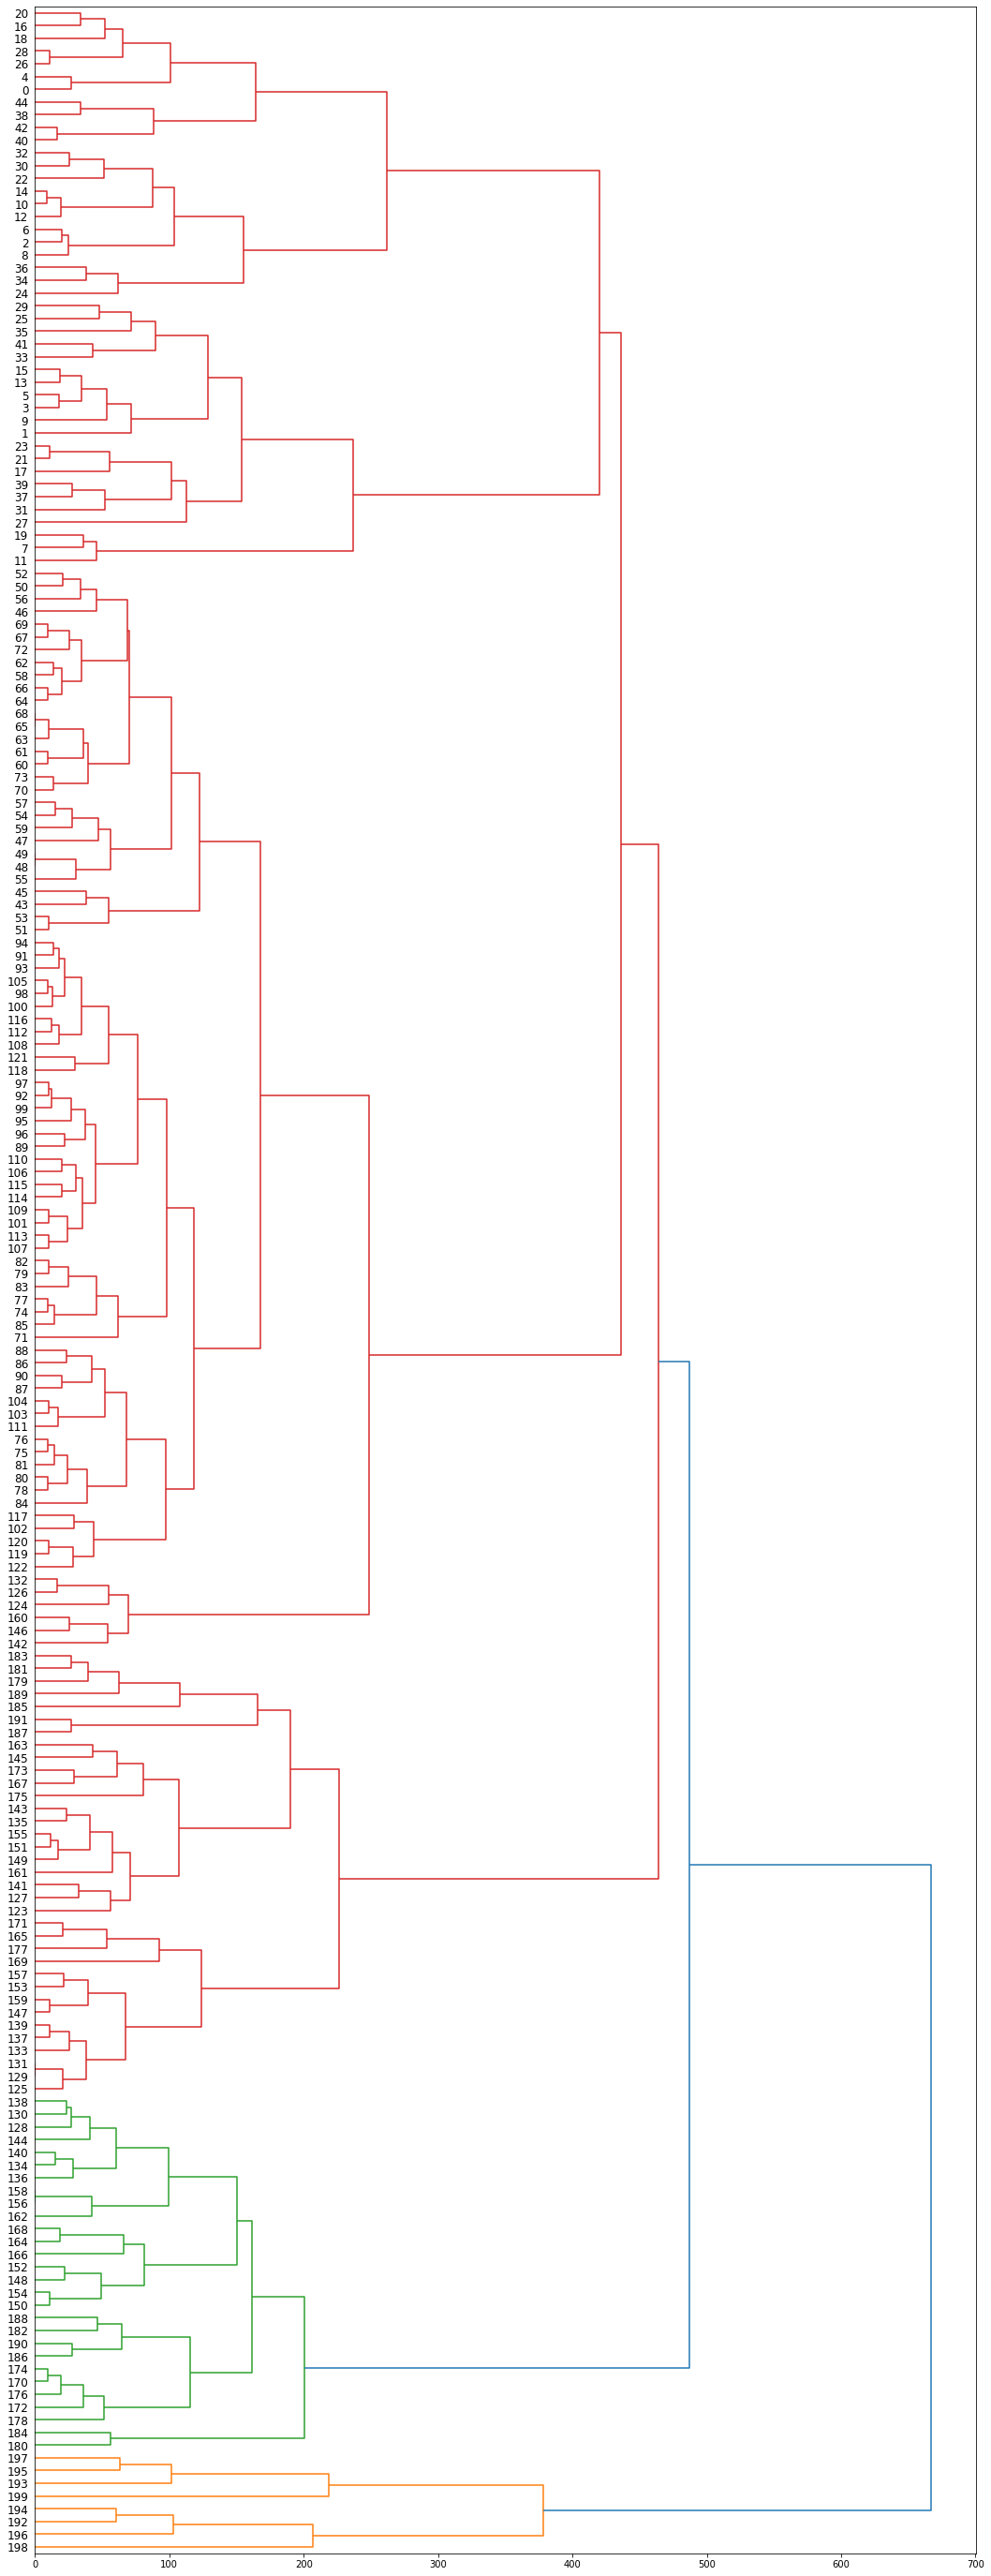

In [17]:
dist = distance_matrix(filtered_dataset, filtered_dataset) # Constructing the distance matrix
Z = hierarchy.linkage(dist, 'average') 
plt.figure(figsize=(18, 50))
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

<h1 style="color:blue;">DBScan Clustering</h1>

<p style="color:brown;">Now we will be applying DbScan Clustering on the relevant dataset and analyze the results produced. The above applied clustering techniques have their pros and cons as discussed in the relevant lessons. Density based clustering like DBScan looks for regions of high density separated from the regions of low density. Density refers to the number of points within a specified radius.As discussed in the lesson two important parameters are involved in it.</p>
<ol style="color:brown;">
<li>eps: dThe maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.</li>
<li>min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.</li>
</ol>

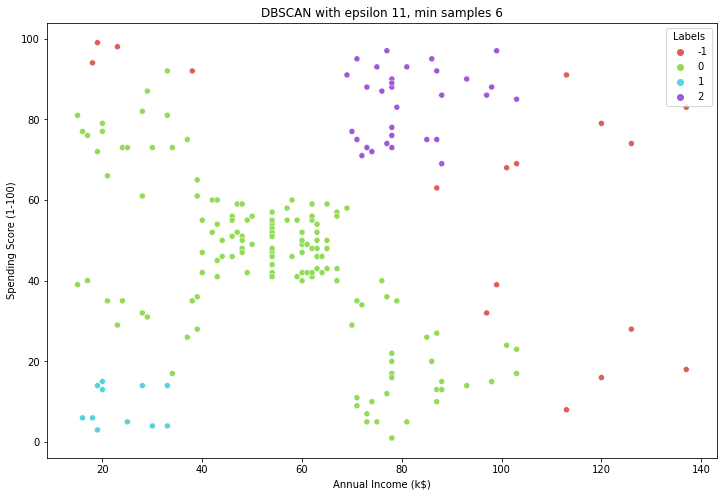

In [18]:
db = DBSCAN(eps=11, min_samples=6).fit(filtered_dataset)
filtered_dataset['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(filtered_dataset['Annual Income (k$)'], filtered_dataset['Spending Score (1-100)'], hue=filtered_dataset['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

<p style="color:brown;font-size:20px;">Clustering Interpretation</p>

<hr>
<ol style="color:brown;">
<li>We can see now that DbScan Clustering has now introduced some new noise points or outliers also labelled as -1.</li>
<li>DbScan clustering seems to form 3 clusters at the current values of eps and min_samples. People having annual income between $\$20k$ and $\$100k$ and spending score between 20 and 100 seems to form one cluster and are labelled in green color.  </li>
<li>People having spending score between 70 and 100 and annual income between $70k$ and $100k$ are clustered together with purple color assigned to them.</li>
<li>We can see a small cluster of points of customers who have low annual income and low spending score. This cluster has been marked as blue in the above diagram. </li>
</ol>

<hr>


<h1 style="color:blue;">Conclusion</h1>
<ul style="color:brown;">
<li>KMeans and Hierarchical clustering somewhat similar clusters and hierarchical clustering merged two clusters as one which were separate in KMeans Clustering. </li>
<li>DbScan produced an entirely different result with also pointing out noise or outliers. Outliers include those customers which have low annual income but they seem to have very high spending score. In the same outliers also point us to those customers which are having high annual income but low spending score. </li>        
</ul>
 